# Dimensionality Reduction

## Why do we need it?

Dimensionality reduction is a crucial technique in machine learning and data analysis that addresses several fundamental challenges:

### 1. **Curse of Dimensionality**
- As the number of features (dimensions) increases, data becomes sparse in high-dimensional space
- Distance metrics become less meaningful
- Algorithms become computationally expensive and less effective

### 2. **Computational Efficiency**
- High-dimensional data requires more memory and processing power
- Training time increases exponentially with dimensions
- Storage requirements become prohibitive

### 3. **Visualization**
- Humans can only visualize data in 2D or 3D effectively
- Dimensionality reduction helps us understand patterns and relationships in data
- Essential for exploratory data analysis

### 4. **Noise Reduction**
- High-dimensional data often contains noise and irrelevant features
- Dimensionality reduction can filter out noise while preserving important information
- Improves signal-to-noise ratio

### 5. **Overfitting Prevention**
- Fewer features reduce the risk of overfitting in machine learning models
- Helps models generalize better to unseen data
- Follows the principle of Occam's razor (simpler models are better)

### 6. **Feature Selection vs Feature Extraction**
- **Feature Selection**: Choose a subset of original features
- **Feature Extraction**: Create new features that are combinations of original features
- Both approaches help reduce dimensionality while preserving important information

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")

Libraries imported successfully!


## Demonstrating the Curse of Dimensionality

Let's create a practical example to show how performance degrades with increasing dimensions.

In [2]:
# Demonstrate curse of dimensionality
def evaluate_performance_by_dimensions():
    dimensions = [5, 10, 20, 50, 100, 200, 500]
    accuracies = []
    training_times = []
    
    for n_features in dimensions:
        # Generate synthetic data
        X, y = make_classification(
            n_samples=1000,
            n_features=n_features,
            n_informative=min(10, n_features//2),  # Limit informative features
            n_redundant=0,
            n_clusters_per_class=1,
            random_state=42
        )
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
        
        # Train model and measure time
        start_time = time.time()
        clf = RandomForestClassifier(n_estimators=50, random_state=42)
        clf.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Evaluate accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        accuracies.append(accuracy)
        training_times.append(training_time)
        
        print(f"Dimensions: {n_features:3d} | Accuracy: {accuracy:.3f} | Time: {training_time:.3f}s")
    
    return dimensions, accuracies, training_times

# Run the evaluation
print("Evaluating performance across different dimensions...")
dims, accs, times = evaluate_performance_by_dimensions()

Evaluating performance across different dimensions...
Dimensions:   5 | Accuracy: 0.940 | Time: 0.064s
Dimensions:  10 | Accuracy: 0.947 | Time: 0.054s
Dimensions:  20 | Accuracy: 0.953 | Time: 0.062s
Dimensions:  50 | Accuracy: 0.977 | Time: 0.094s
Dimensions:  20 | Accuracy: 0.953 | Time: 0.062s
Dimensions:  50 | Accuracy: 0.977 | Time: 0.094s
Dimensions: 100 | Accuracy: 0.930 | Time: 0.147s
Dimensions: 200 | Accuracy: 0.917 | Time: 0.192s
Dimensions: 100 | Accuracy: 0.930 | Time: 0.147s
Dimensions: 200 | Accuracy: 0.917 | Time: 0.192s
Dimensions: 500 | Accuracy: 0.900 | Time: 0.288s
Dimensions: 500 | Accuracy: 0.900 | Time: 0.288s


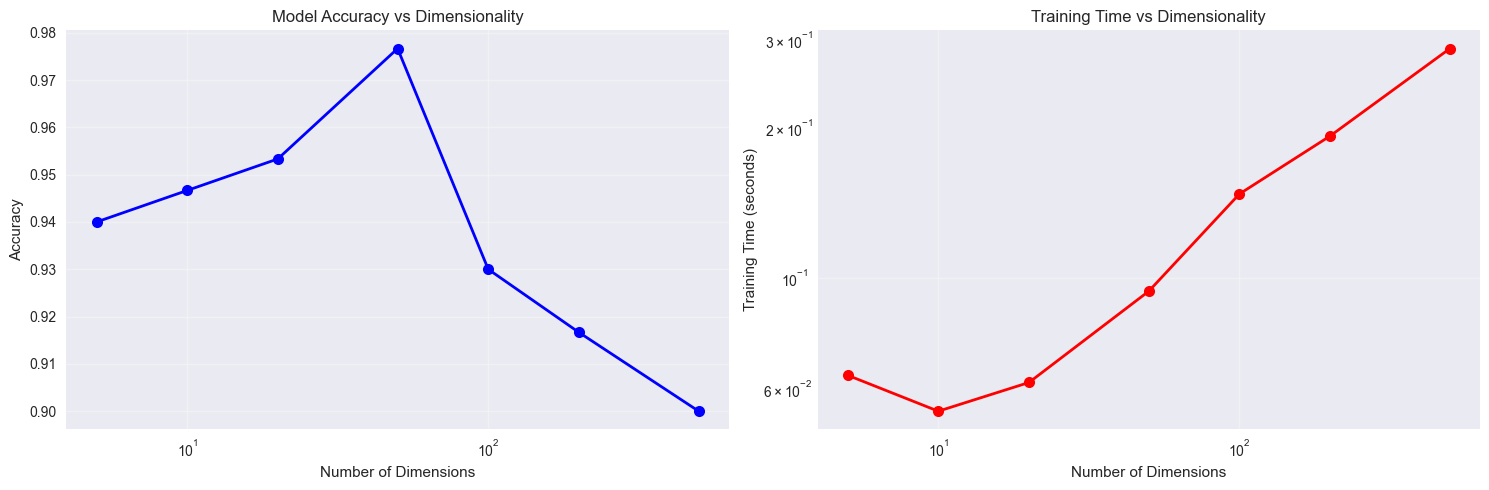


Key Observations:
• Accuracy generally decreases with more dimensions
• Training time increases exponentially
• Sweet spot appears to be around 50 dimensions


In [3]:
# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy vs dimensions
ax1.plot(dims, accs, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy vs Dimensionality')
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Plot training time vs dimensions
ax2.plot(dims, times, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Dimensions')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Time vs Dimensionality')
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"\nKey Observations:")
print(f"• Accuracy generally decreases with more dimensions")
print(f"• Training time increases exponentially")
print(f"• Sweet spot appears to be around {dims[np.argmax(accs)]} dimensions")

## Common Dimensionality Reduction Techniques

### 📊 Categorization by Type of Transformation

#### **Linear Methods**
- **PCA (Principal Component Analysis)**: Finds linear combinations that maximize variance
- **LDA (Linear Discriminant Analysis)**: Finds linear combinations that maximize class separation

#### **Non-Linear Methods**
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: Preserves local neighborhood structure
- **UMAP (Uniform Manifold Approximation and Projection)**: Preserves both local and global structure

---

### 🎯 Categorization by Learning Approach

#### **Unsupervised Methods** (No target labels needed)
- **PCA**: Variance-based dimensionality reduction
- **t-SNE**: Neighborhood preservation
- **UMAP**: Manifold learning

#### **Supervised Methods** (Requires target labels)
- **LDA**: Maximizes class discrimination

---

### 🔧 Categorization by Primary Use Case

#### **Data Compression & Noise Reduction**
- **PCA**: Excellent for data compression while preserving variance

#### **Visualization & Exploration**
- **t-SNE**: Perfect for 2D/3D visualization of clusters
- **UMAP**: Better for preserving global structure in visualizations

#### **Classification Enhancement**
- **LDA**: Specifically designed to improve classification performance

#### **General Purpose**
- **PCA**: Versatile for many applications
- **UMAP**: Good balance between local and global preservation

---

### ⚡ Categorization by Computational Complexity

#### **Fast & Efficient**
- **PCA**: Very fast, scales well
- **LDA**: Fast for supervised tasks

#### **Computationally Intensive**
- **t-SNE**: Slower, especially for large datasets
- **UMAP**: Faster than t-SNE but still computationally demanding

---

### 🎯 What Each Technique Preserves

| Technique | Preserves | Best For |
|-----------|-----------|----------|
| **PCA** | Maximum variance, global structure | Data compression, noise reduction |
| **t-SNE** | Local neighborhoods, cluster structure | Visualization, cluster analysis |
| **LDA** | Class discrimination, separability | Classification tasks |
| **UMAP** | Both local & global relationships | Large datasets, balanced preservation |

---

### 📋 Detailed Technique Breakdown

### 1. **Principal Component Analysis (PCA)**
- **Type**: Linear, unsupervised
- **Goal**: Find orthogonal components that maximize variance
- **Best for**: Continuous data, noise reduction, data compression
- **Preserves**: Maximum variance in the data
- **Computational Complexity**: O(min(n³, p³)) where n=samples, p=features
- **Reversible**: Yes (can reconstruct original data)

### 2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
- **Type**: Non-linear, unsupervised
- **Goal**: Preserve local neighborhood structure
- **Best for**: Visualization, clustering analysis
- **Preserves**: Local relationships between points
- **Computational Complexity**: O(n²) - can be expensive for large datasets
- **Reversible**: No (information is lost in the transformation)

### 3. **Linear Discriminant Analysis (LDA)**
- **Type**: Linear, supervised
- **Goal**: Maximize class separability
- **Best for**: Classification problems
- **Preserves**: Class discrimination information
- **Computational Complexity**: O(n×p×c) where c=number of classes
- **Reversible**: Yes (linear transformation)

### 4. **UMAP (Uniform Manifold Approximation and Projection)**
- **Type**: Non-linear, unsupervised
- **Goal**: Preserve both local and global structure
- **Best for**: Large datasets, preserving global structure
- **Preserves**: Both local and global relationships
- **Computational Complexity**: O(n^1.14) - more scalable than t-SNE
- **Reversible**: No (non-linear transformation)

---

### 🚀 Quick Selection Guide

**Choose PCA when:**
- ✅ You need fast, interpretable results
- ✅ Data compression is important
- ✅ You want to remove noise
- ✅ Reversibility is required

**Choose t-SNE when:**
- ✅ Visualization is the primary goal
- ✅ Cluster discovery is important
- ✅ Dataset size is manageable (<10K samples)
- ❌ Don't use for: Machine learning pipelines, large datasets

**Choose LDA when:**
- ✅ You have labeled data
- ✅ Classification performance is key
- ✅ You need interpretable discriminant functions
- ❌ Don't use for: Unsupervised learning, non-linear relationships

**Choose UMAP when:**
- ✅ You have large datasets
- ✅ You want both local and global structure
- ✅ Faster than t-SNE performance is needed
- ✅ You're working with complex, non-linear data

Let's implement and compare these techniques:

In [4]:
# Load and prepare datasets for demonstration
iris = load_iris()
digits = load_digits()

print("Dataset Information:")
print(f"Iris dataset: {iris.data.shape[0]} samples, {iris.data.shape[1]} features, {len(iris.target_names)} classes")
print(f"Digits dataset: {digits.data.shape[0]} samples, {digits.data.shape[1]} features, {len(digits.target_names)} classes")

# Standardize the data (important for PCA and t-SNE)
scaler_iris = StandardScaler()
iris_scaled = scaler_iris.fit_transform(iris.data)

scaler_digits = StandardScaler()
digits_scaled = scaler_digits.fit_transform(digits.data)

Dataset Information:
Iris dataset: 150 samples, 4 features, 3 classes
Digits dataset: 1797 samples, 64 features, 10 classes


PCA ANALYSIS

Iris Dataset - PCA Results:
Explained variance ratio (first 2 components): [0.72962445 0.22850762]
Total variance explained: 0.958

Digits Dataset - PCA Results:
Explained variance ratio (first 2 components): [0.12033916 0.09561054]
Total variance explained: 0.216


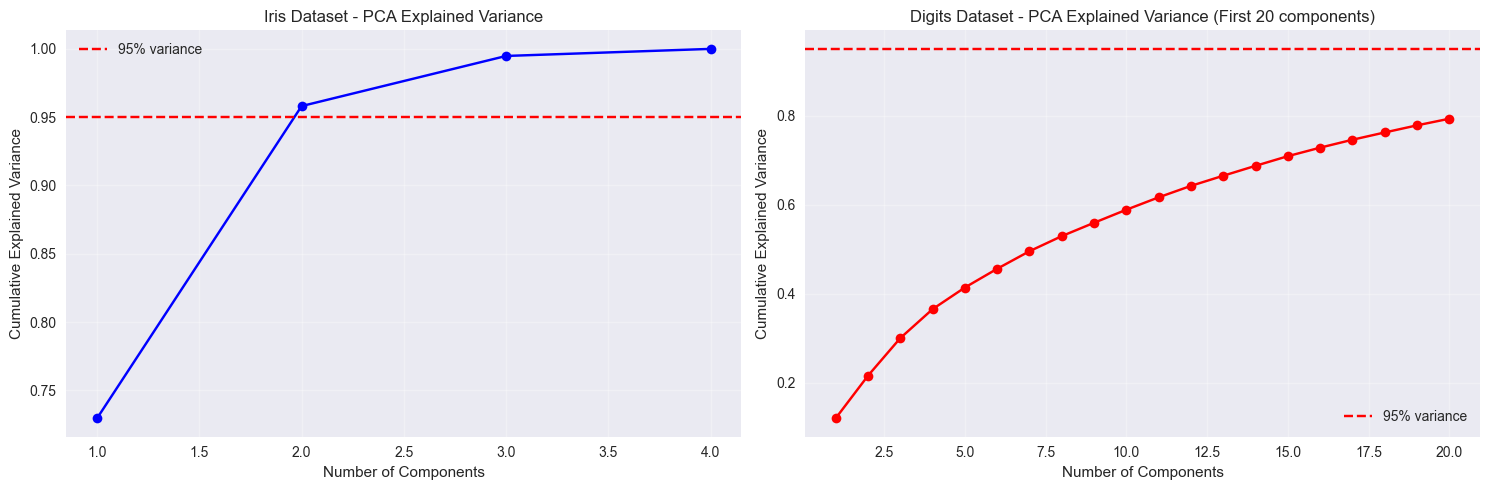


Components needed for 95% variance:
Iris: 2 out of 4 (50.0%)
Digits: 40 out of 64 (62.5%)


In [5]:
# 1. Principal Component Analysis (PCA)
print("=" * 50)
print("PCA ANALYSIS")
print("=" * 50)

# PCA on Iris dataset
pca_iris = PCA(n_components=2)
iris_pca = pca_iris.fit_transform(iris_scaled)

# PCA on Digits dataset
pca_digits = PCA(n_components=2)
digits_pca = pca_digits.fit_transform(digits_scaled)

# Analyze explained variance
pca_full_iris = PCA()
pca_full_iris.fit(iris_scaled)

pca_full_digits = PCA()
pca_full_digits.fit(digits_scaled)

print(f"\nIris Dataset - PCA Results:")
print(f"Explained variance ratio (first 2 components): {pca_iris.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_iris.explained_variance_ratio_):.3f}")

print(f"\nDigits Dataset - PCA Results:")
print(f"Explained variance ratio (first 2 components): {pca_digits.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_digits.explained_variance_ratio_):.3f}")

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Iris cumulative variance
cumvar_iris = np.cumsum(pca_full_iris.explained_variance_ratio_)
ax1.plot(range(1, len(cumvar_iris) + 1), cumvar_iris, 'bo-')
ax1.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance')
ax1.set_title('Iris Dataset - PCA Explained Variance')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Digits cumulative variance
cumvar_digits = np.cumsum(pca_full_digits.explained_variance_ratio_)
ax2.plot(range(1, min(21, len(cumvar_digits) + 1)), cumvar_digits[:20], 'ro-')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Digits Dataset - PCA Explained Variance (First 20 components)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
components_95_iris = np.argmax(cumvar_iris >= 0.95) + 1
components_95_digits = np.argmax(cumvar_digits >= 0.95) + 1

print(f"\nComponents needed for 95% variance:")
print(f"Iris: {components_95_iris} out of {iris.data.shape[1]} ({components_95_iris/iris.data.shape[1]*100:.1f}%)")
print(f"Digits: {components_95_digits} out of {digits.data.shape[1]} ({components_95_digits/digits.data.shape[1]*100:.1f}%)")

t-SNE ANALYSIS
Computing t-SNE for Iris dataset...
Computing t-SNE for Digits dataset...
Computing t-SNE for Digits dataset...
t-SNE computation completed!
t-SNE computation completed!


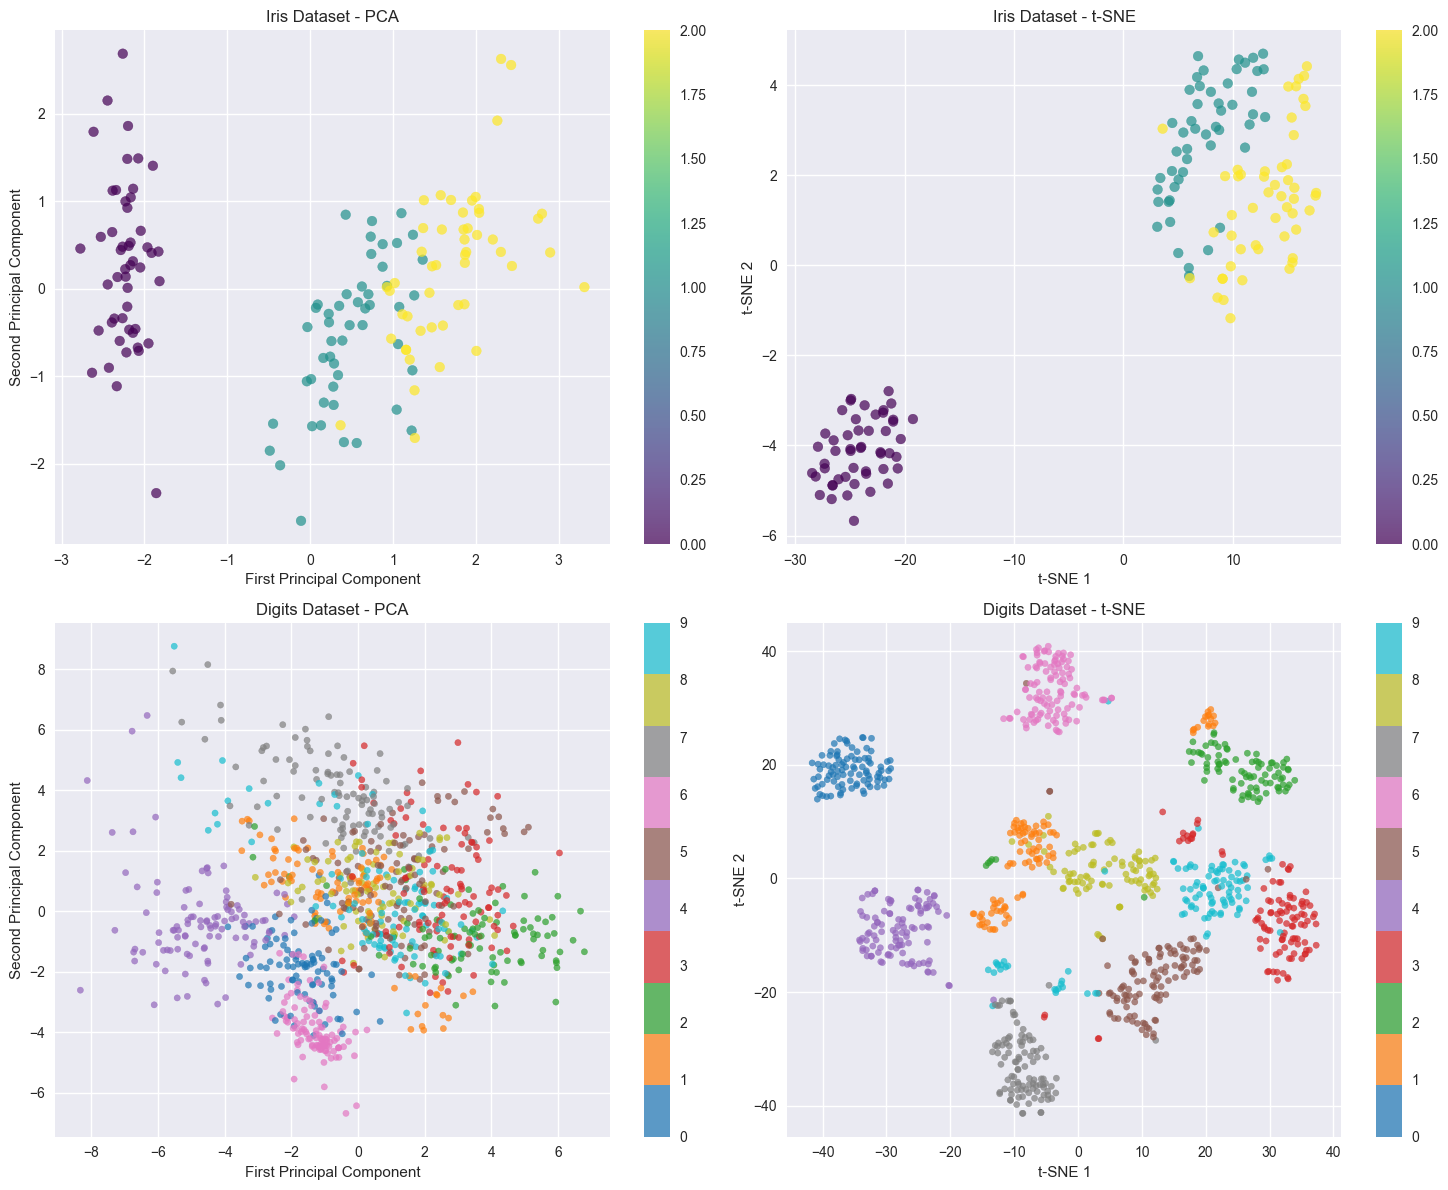


Key Observations:
• PCA preserves global structure and variance
• t-SNE better preserves local neighborhood relationships
• t-SNE often shows clearer cluster separation
• PCA is linear, t-SNE is non-linear
• t-SNE is computationally more expensive


In [6]:
# 2. t-SNE Implementation
print("=" * 50)
print("t-SNE ANALYSIS")
print("=" * 50)

# t-SNE on Iris dataset
print("Computing t-SNE for Iris dataset...")
tsne_iris = TSNE(n_components=2, random_state=42, perplexity=30)
iris_tsne = tsne_iris.fit_transform(iris_scaled)

# t-SNE on Digits dataset (using subset for speed)
print("Computing t-SNE for Digits dataset...")
# Use a subset of digits data for faster computation
subset_size = 1000
indices = np.random.choice(len(digits_scaled), subset_size, replace=False)
digits_subset = digits_scaled[indices]
digits_target_subset = digits.target[indices]

tsne_digits = TSNE(n_components=2, random_state=42, perplexity=30)
digits_tsne = tsne_digits.fit_transform(digits_subset)

print("t-SNE computation completed!")

# Create comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Iris PCA
scatter1 = axes[0,0].scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target, cmap='viridis', alpha=0.7)
axes[0,0].set_title('Iris Dataset - PCA')
axes[0,0].set_xlabel('First Principal Component')
axes[0,0].set_ylabel('Second Principal Component')
plt.colorbar(scatter1, ax=axes[0,0])

# Iris t-SNE
scatter2 = axes[0,1].scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris.target, cmap='viridis', alpha=0.7)
axes[0,1].set_title('Iris Dataset - t-SNE')
axes[0,1].set_xlabel('t-SNE 1')
axes[0,1].set_ylabel('t-SNE 2')
plt.colorbar(scatter2, ax=axes[0,1])

# Digits PCA (using subset)
digits_pca_subset = pca_digits.transform(digits_subset)
scatter3 = axes[1,0].scatter(digits_pca_subset[:, 0], digits_pca_subset[:, 1], 
                           c=digits_target_subset, cmap='tab10', alpha=0.7, s=20)
axes[1,0].set_title('Digits Dataset - PCA')
axes[1,0].set_xlabel('First Principal Component')
axes[1,0].set_ylabel('Second Principal Component')
plt.colorbar(scatter3, ax=axes[1,0])

# Digits t-SNE
scatter4 = axes[1,1].scatter(digits_tsne[:, 0], digits_tsne[:, 1], 
                           c=digits_target_subset, cmap='tab10', alpha=0.7, s=20)
axes[1,1].set_title('Digits Dataset - t-SNE')
axes[1,1].set_xlabel('t-SNE 1')
axes[1,1].set_ylabel('t-SNE 2')
plt.colorbar(scatter4, ax=axes[1,1])

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("• PCA preserves global structure and variance")
print("• t-SNE better preserves local neighborhood relationships")
print("• t-SNE often shows clearer cluster separation")
print("• PCA is linear, t-SNE is non-linear")
print("• t-SNE is computationally more expensive")

## Practical Recommendations and Best Practices

### When to Use Each Technique:

#### **Use PCA when:**
- You need to reduce dimensionality while preserving maximum variance
- You want a linear transformation that's reversible
- You need to compress data for storage or transmission
- You want to remove noise from your data
- You need fast computation and interpretable components

#### **Use t-SNE when:**
- You want to visualize high-dimensional data in 2D/3D
- You need to preserve local neighborhood structure
- You're doing exploratory data analysis to find clusters
- You don't need the transformation to be reversible
- Computational time is not a major constraint

#### **Use LDA when:**
- You have labeled data and want to maximize class separation
- You're doing supervised dimensionality reduction
- You want to improve classification performance
- You need interpretable discriminant functions

### **Best Practices:**

1. **Always standardize your data** before applying PCA or t-SNE
2. **Choose the right number of components** based on explained variance
3. **Consider computational complexity** for large datasets
4. **Validate results** with downstream tasks (classification, clustering)
5. **Try multiple techniques** and compare results
6. **Be careful with interpretation** - especially for non-linear methods

### **Common Pitfalls to Avoid:**

- Don't apply PCA to categorical data without proper encoding
- Don't use t-SNE for anything other than visualization
- Don't over-interpret t-SNE plots (cluster sizes and distances can be misleading)
- Don't forget to scale your data appropriately
- Don't assume more components are always better

DIMENSIONALITY REDUCTION IMPACT ON ML PERFORMANCE
Components:  5 | Accuracy: 0.798 | Time: 0.013s | Variance: 0.405
Components: 10 | Accuracy: 0.874 | Time: 0.012s | Variance: 0.589
Components: 20 | Accuracy: 0.933 | Time: 0.009s | Variance: 0.799
Components: 30 | Accuracy: 0.963 | Time: 0.008s | Variance: 0.898
Components: 40 | Accuracy: 0.970 | Time: 0.008s | Variance: 0.954
Components: 50 | Accuracy: 0.972 | Time: 0.008s | Variance: 0.984
Components: 64 | Accuracy: 0.970 | Time: 0.008s | Variance: 1.000


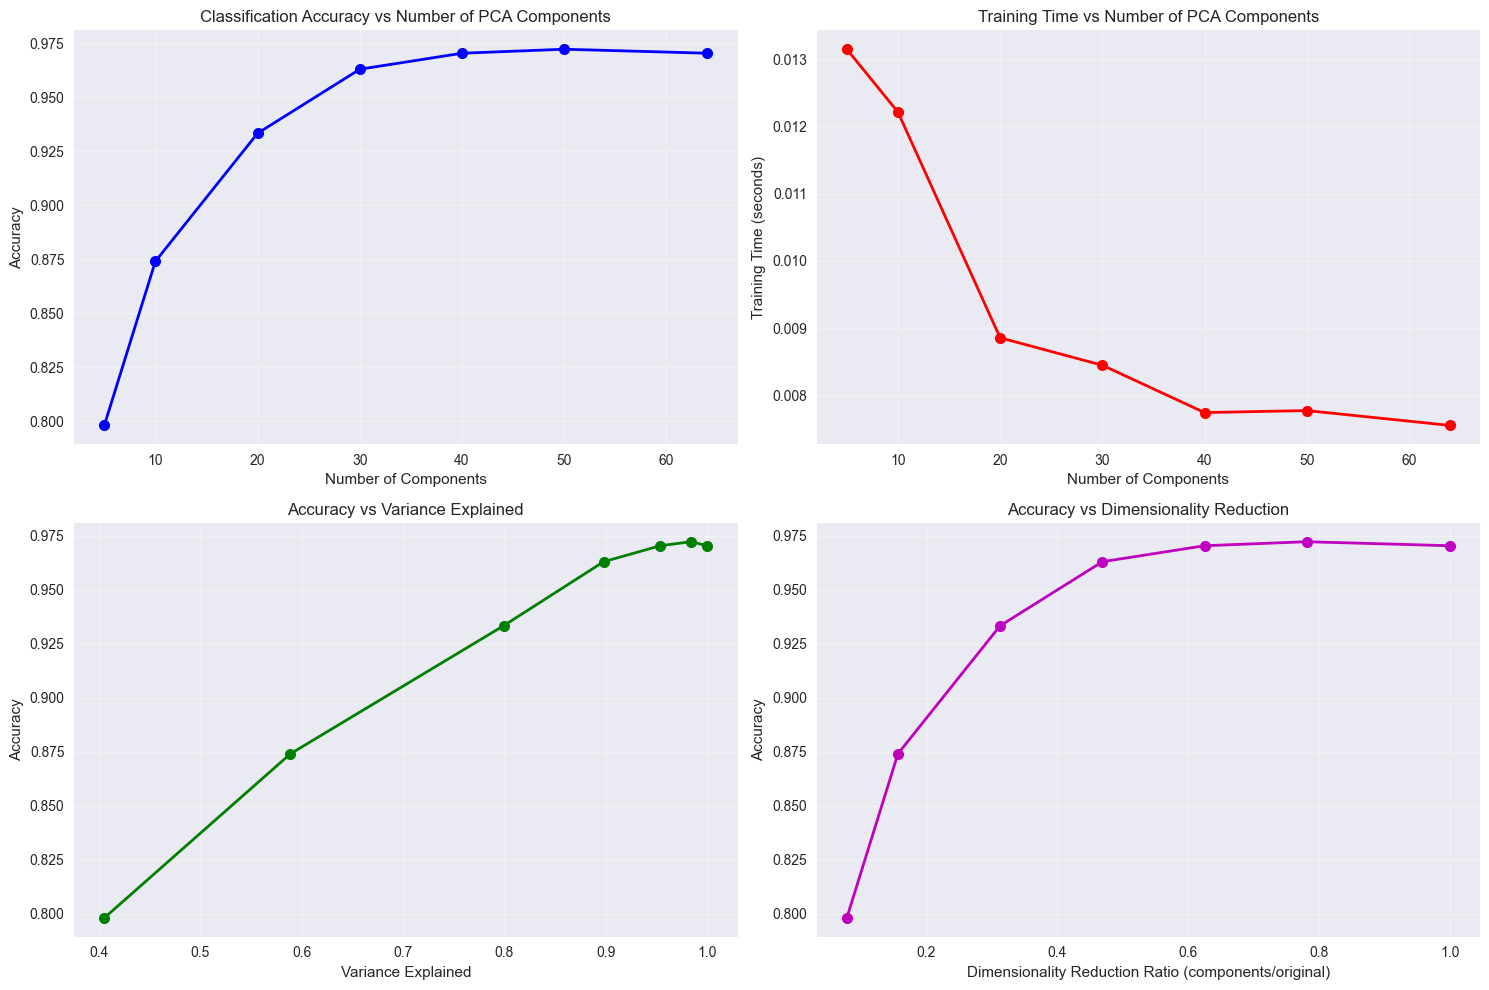


OPTIMAL CONFIGURATION:
• Best accuracy: 0.972
• Components needed: 50.0
• Dimensionality reduction: 21.9%
• Variance explained: 0.984
• Training time: 0.008s
• Speed improvement: 1.0x faster


In [7]:
# Practical Example: Impact on Machine Learning Performance
print("=" * 60)
print("DIMENSIONALITY REDUCTION IMPACT ON ML PERFORMANCE")
print("=" * 60)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Use digits dataset for this analysis
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Test different numbers of PCA components
components_to_test = [5, 10, 20, 30, 40, 50, 64]  # 64 is the original dimension
results = []

for n_components in components_to_test:
    if n_components == 64:
        # Use original data
        X_train_transformed = X_train
        X_test_transformed = X_test
        variance_explained = 1.0
    else:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_transformed = pca.fit_transform(X_train)
        X_test_transformed = pca.transform(X_test)
        variance_explained = sum(pca.explained_variance_ratio_)
    
    # Train classifier
    start_time = time.time()
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X_train_transformed, y_train)
    training_time = time.time() - start_time
    
    # Evaluate
    y_pred = clf.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'variance_explained': variance_explained,
        'reduction_ratio': n_components / 64
    })
    
    print(f"Components: {n_components:2d} | Accuracy: {accuracy:.3f} | "
          f"Time: {training_time:.3f}s | Variance: {variance_explained:.3f}")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy vs Components
ax1.plot(results_df['components'], results_df['accuracy'], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Accuracy')
ax1.set_title('Classification Accuracy vs Number of PCA Components')
ax1.grid(True, alpha=0.3)

# Training Time vs Components
ax2.plot(results_df['components'], results_df['training_time'], 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Time vs Number of PCA Components')
ax2.grid(True, alpha=0.3)

# Accuracy vs Variance Explained
ax3.plot(results_df['variance_explained'], results_df['accuracy'], 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Variance Explained')
ax3.set_ylabel('Accuracy')
ax3.set_title('Accuracy vs Variance Explained')
ax3.grid(True, alpha=0.3)

# Efficiency Plot: Accuracy vs Reduction Ratio
ax4.plot(results_df['reduction_ratio'], results_df['accuracy'], 'mo-', linewidth=2, markersize=8)
ax4.set_xlabel('Dimensionality Reduction Ratio (components/original)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Accuracy vs Dimensionality Reduction')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal number of components
best_idx = results_df['accuracy'].idxmax()
optimal_result = results_df.iloc[best_idx]

print(f"\n" + "="*50)
print("OPTIMAL CONFIGURATION:")
print(f"• Best accuracy: {optimal_result['accuracy']:.3f}")
print(f"• Components needed: {optimal_result['components']}")
print(f"• Dimensionality reduction: {(1-optimal_result['reduction_ratio'])*100:.1f}%")
print(f"• Variance explained: {optimal_result['variance_explained']:.3f}")
print(f"• Training time: {optimal_result['training_time']:.3f}s")
print(f"• Speed improvement: {results_df.iloc[-1]['training_time']/optimal_result['training_time']:.1f}x faster")

## Summary and Conclusion

### Key Takeaways:

1. **Dimensionality reduction is essential** for modern machine learning and data analysis
2. **The curse of dimensionality** is real and significantly impacts model performance
3. **Different techniques serve different purposes**:
   - PCA for variance preservation and data compression
   - t-SNE for visualization and cluster discovery
   - LDA for supervised classification tasks

4. **Proper preprocessing** (especially scaling) is crucial for success
5. **There's often a sweet spot** where reduced dimensions maintain performance while improving efficiency
6. **Always validate** your dimensionality reduction choices with downstream tasks

### When to Apply Dimensionality Reduction:

✅ **DO use when:**
- You have high-dimensional data (>50-100 features)
- Computational resources are limited
- You need to visualize complex data
- You suspect noise or redundant features
- You want to prevent overfitting

❌ **DON'T use when:**
- You have very few features already
- All features are known to be important
- You need full interpretability of original features
- Computational cost is not a concern

### Final Recommendations:

1. **Start with PCA** for most dimensionality reduction tasks
2. **Use t-SNE** specifically for visualization
3. **Always compare** reduced vs. original performance
4. **Consider domain knowledge** when interpreting results
5. **Experiment** with different numbers of components
6. **Document your choices** and rationale for reproducibility

Remember: Dimensionality reduction is both an art and a science. The best approach depends on your specific data, problem, and constraints!